### To build a machine learning model that predicts whether a patient is at risk of developing Coronary Heart Disease (CHD) within 10 years based on health indicators

### STEP 1: Importing Necessary Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, roc_auc_score
)

In [2]:
#load data set
df= pd.read_csv(r"C:\Users\RAVINDRA MANDAL\Desktop\Web Programing\Project\Inlight global pvt ltd\Heart Disease Prediction Using Logistic Regression\framingham.csv")

In [3]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [5]:
#drop Unnecessary column
df.drop(columns=['education'], inplace=True)

In [6]:
#rename column for Better Readability
df.rename(columns={
    'male': 'gender',
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigs_per_day',
    'BPMeds': 'bp_meds',
    'prevalentStroke': 'stroke',
    'prevalentHyp': 'hypertension',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'glucose': 'glucose_level',
    'TenYearCHD': 'ten_year_chd'
}, inplace=True)

print(df.columns)

Index(['gender', 'age', 'current_smoker', 'cigs_per_day', 'bp_meds', 'stroke',
       'hypertension', 'diabetes', 'total_cholesterol', 'systolic_bp',
       'diastolic_bp', 'bmi', 'heart_rate', 'glucose_level', 'ten_year_chd'],
      dtype='object')


### STEP 2: Data Preprocessing

In [7]:
#handle missing value
df.dropna(inplace=True)

In [8]:
#separate features and target variable
X = df.drop(columns=['ten_year_chd'])
y = df['ten_year_chd']

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [17]:
#Normalize Numerical Features (StandardScaler)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### STEP 3: Exploratory Data Analysis (EDA)

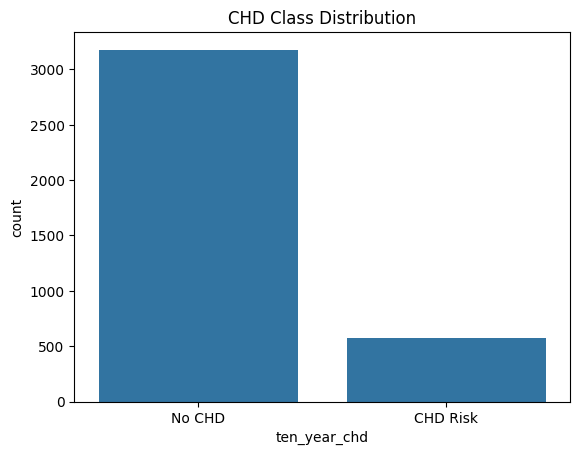

In [10]:
#CHD Class Distribution
sns.countplot(x='ten_year_chd', data=df)
plt.xticks([0, 1], ['No CHD', 'CHD Risk'])
plt.title('CHD Class Distribution')
plt.show()

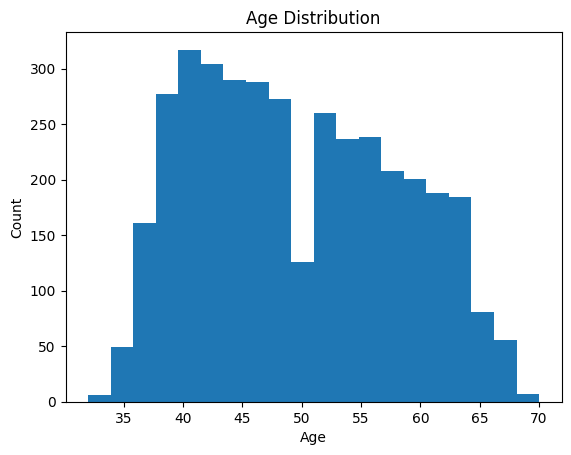

In [11]:
#age distribution
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

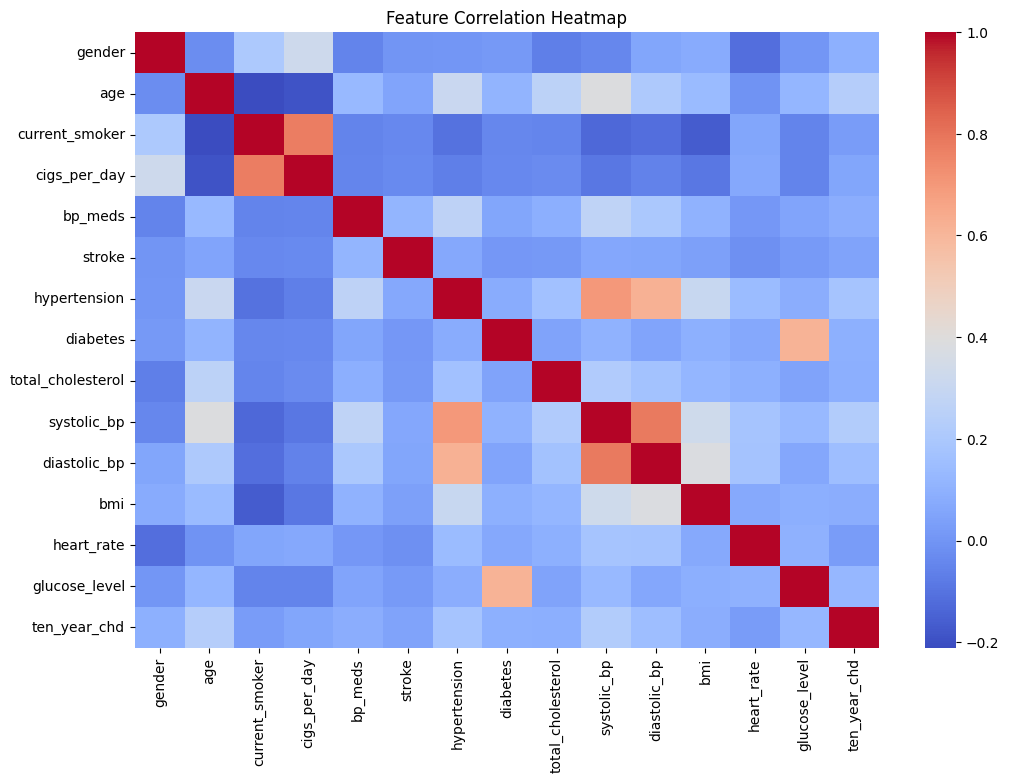

In [12]:
#corelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

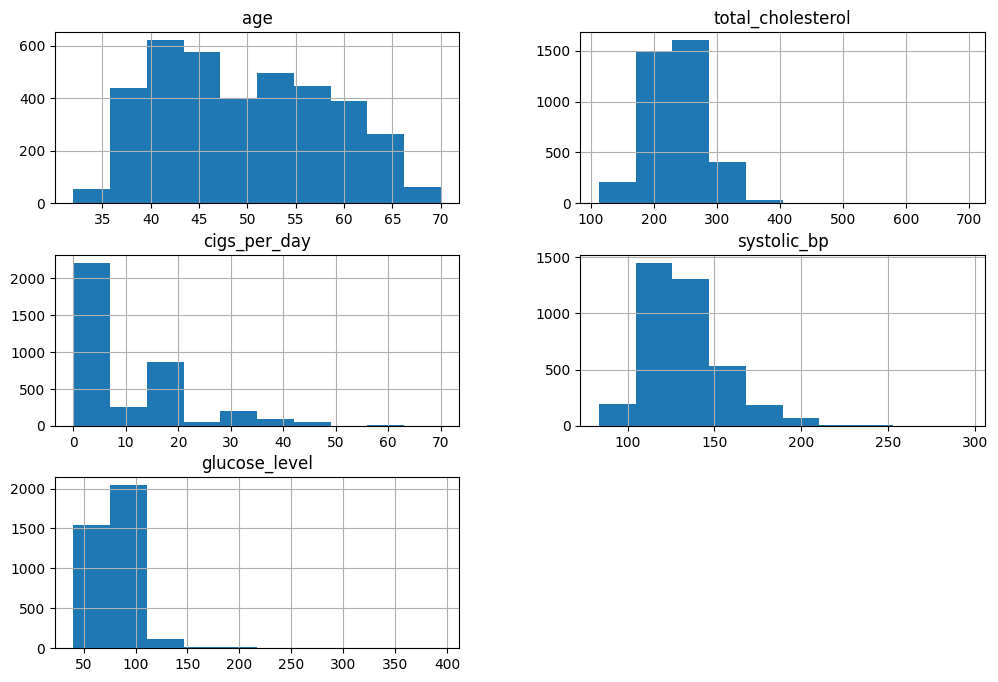

In [13]:
#Key Risk Factors Visualization
risk_features = ['age', 'total_cholesterol', 'cigs_per_day', 'systolic_bp', 'glucose_level']

df[risk_features].hist(figsize=(12,8))
plt.show()

### STEP 4: Model Training using Logistic Regression

In [14]:
#logistic regrassion model
model = LogisticRegression(max_iter=1000)

In [18]:
#train model
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### STEP 5: Model Evaluation and Prediction

In [20]:
#predict
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [21]:
#Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8339253996447602

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       938
           1       0.52      0.07      0.12       188

    accuracy                           0.83      1126
   macro avg       0.68      0.53      0.52      1126
weighted avg       0.79      0.83      0.78      1126



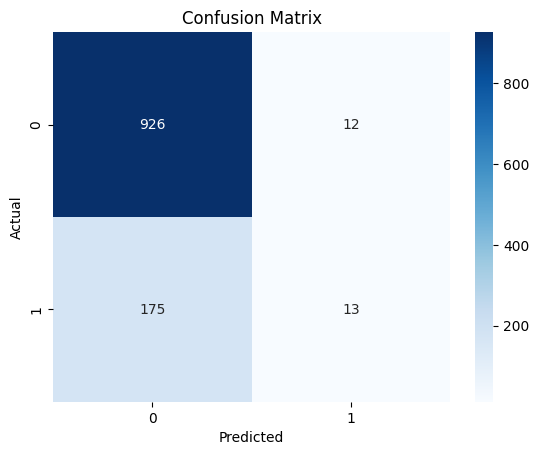

In [22]:
#confuction metrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

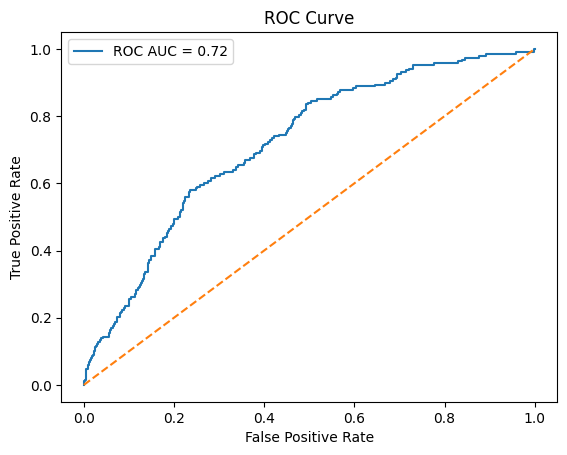

In [23]:
#ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
print(list(X.columns))

['gender', 'age', 'current_smoker', 'cigs_per_day', 'bp_meds', 'stroke', 'hypertension', 'diabetes', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose_level']


In [36]:
new_patient = pd.DataFrame([{
    'age': 45,
    'gender': 1,              # 1 = Male, 0 = Female
    'current_smoker': 1,
    'cigs_per_day': 20,
    'bp_meds': 0,
    'stroke': 0,
    'hypertension': 0,
    'diabetes': 0,            # ✅ THIS WAS MISSING
    'total_cholesterol': 240,
    'systolic_bp': 150,
    'diastolic_bp': 95,
    'bmi': 28,
    'heart_rate': 75,
    'glucose_level': 85
}])

In [37]:
new_patient = new_patient[X.columns]

In [38]:
new_patient_scaled = scaler.transform(new_patient)

prediction = model.predict(new_patient_scaled)[0]
probability = model.predict_proba(new_patient_scaled)[0][1]

if prediction == 1:
    print(f"⚠️ High Risk of CHD (10-year risk probability: {probability:.2f})")
else:
    print(f"✅ Low Risk of CHD (10-year risk probability: {probability:.2f})")

✅ Low Risk of CHD (10-year risk probability: 0.17)


### Conclusion

* Successfully developed a Logistic Regression model to predict 10-year CHD risk
* Identified key risk factors such as age, cholesterol, smoking, blood pressure, and glucose
* Model supports early heart disease detection